In [ ]:
# Here We are importing Iris dataset 
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


Here we are going to implement the SVM Model . SVM is a powerful model as we as time expensive . It can be used a classifier as we as a regressor. Here we are going to use it as a classifier.

Before going into staright implementation , lets talk about the iris dataset and intuition behind SVM

In [ ]:
import pandas as pd
import numpy as np
# Data preprocessors
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Model Imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# plotting tools
from matplotlib import pyplot as plt

Iris Dataset contains 3 types of flowers namely 'Iris-Setosa' , 'Iris-Versicolor' and 'Iris-Virginica' 

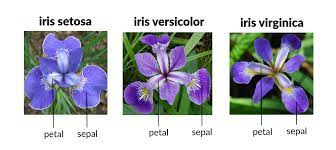

This dataset have four features namely 'SepalWidthCm', 'PetalWidthcm' ,'SepalLengthcm' , 'PetalLengthcm'. However here we are going to use two features sepal and petal length and we are going to drop sepal and petal width. We are going to use only two features because it is easy to visualize the Hyperplane. And we are going to make classification between only two flowers again because easy visualization.

In [ ]:
# first 100 contains two flowers , so we are going to use only first 100 rows.
data = pd.read_csv('Iris.csv')
data = data[:100]
data = data.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [ ]:
print(data.head(),'\n')
print(data.tail(),'\n \n') # checking our data here
print(data.info())

   Id  SepalLengthCm  PetalLengthCm      Species
0   1            5.1            1.4  Iris-setosa
1   2            4.9            1.4  Iris-setosa
2   3            4.7            1.3  Iris-setosa
3   4            4.6            1.5  Iris-setosa
4   5            5.0            1.4  Iris-setosa 

     Id  SepalLengthCm  PetalLengthCm          Species
95   96            5.7            4.2  Iris-versicolor
96   97            5.7            4.2  Iris-versicolor
97   98            6.2            4.3  Iris-versicolor
98   99            5.1            3.0  Iris-versicolor
99  100            5.7            4.1  Iris-versicolor 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   Species        100 non-null    object 
dty

(100, 2)


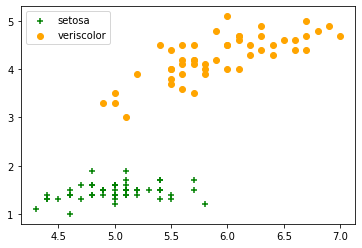

In [ ]:
# extracting our required data:

target = np.array(data['Species'].apply(lambda x: 1 if x=="Iris-setosa" else -1)) # here extracting the target values and assiging 1 to iris-setosa and -1 to versicolor
sepal = np.array(data['SepalLengthCm']) 
petal = np.array(data['PetalLengthCm'])
X = np.transpose([sepal,petal])  #transpose to make them paired , used later to create train and test data
verification_data = np.transpose([sepal,petal,target]) # will be used later 
print(f' shape of Xdata {X.shape}') # checking the shape

# Plottimg the data:

plt.scatter(sepal[:50],petal[:50],marker='+',color='green',label="setosa")
plt.scatter(sepal[50:],petal[50:],marker='o',color='orange',label="veriscolor")
plt.legend(loc='best')

The [**Support Vector Machine**](https://towardsdatascience.com/implementing-svm-from-scratch-784e4ad0bc6a) ***(SVM)***, developed by the computer science community in the 1990s, is a supervised learning algorithm commonly used and originally intended for a binary classification setting.

SVM uses maximum marginal classifier algorith to find the hyeprplane.But what is a hyperplane?

"Hyperplane" is the plane which classifies the datapoints with maximum margin between them.Margin is the sum of distance between the plane and two nearest datapoints of the two classes to the plane.


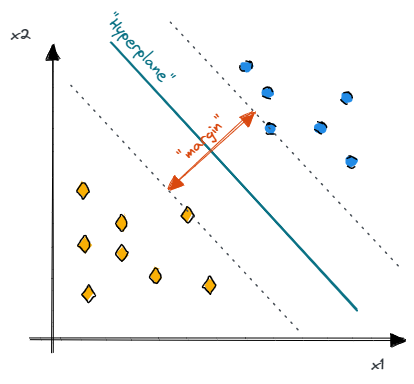
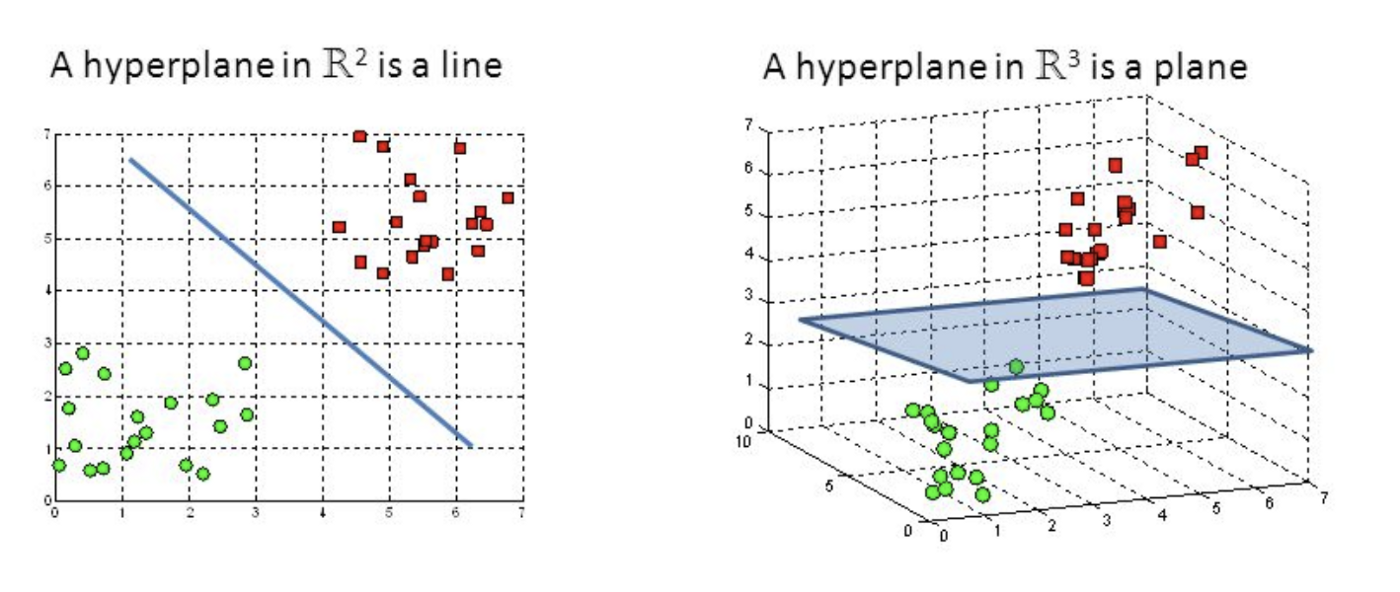

In general, a hyperplane in p dimensions can be described as a flat affine subspace with the dimension p-1.

For example dataset with two features(2D) can be classified by a hyperplane of dimension-1.First to get the hyperplane , we will classify the datapoints as {1,-1}.

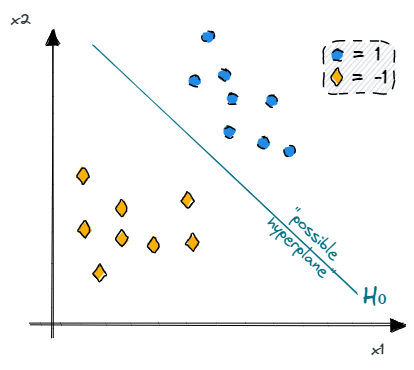

Generally we can write the equation of the plane as  image.png 

But two classes of data can seperated by multiple hyperplanes , but how we will choose the optimal hyperplane ? The answer is the hyperplane with maximum margin or distance between the two class of datapoints.

 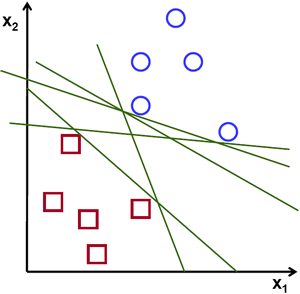                                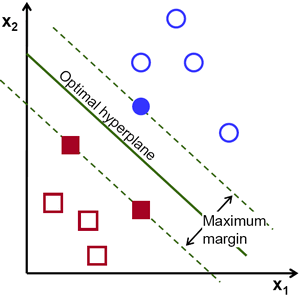

Next we are going to discuss how to find the equation of the Hyperplane.In the last last section we have encoded the classes as {-1,1} (-1 to versicolor and 1 to setosa).There is a reason for doing it.Let H1 and H2 be two planes and H0 be the plane we looking for.

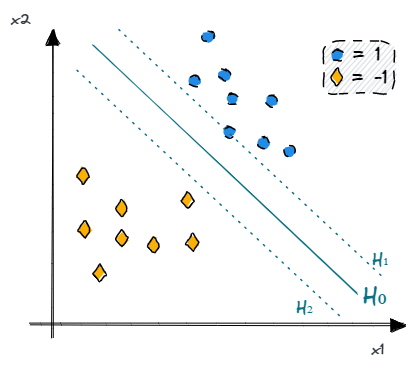

**The planes (H₁, H₂) can therefore be defined as**

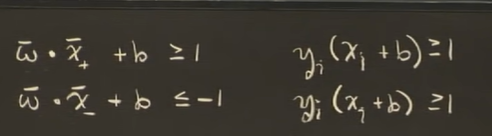

Here for simplicity we are using the term '1' , but we can use any term 'c' which should be **+c** for class with **+1** label and **-c** for class with **'-1'** label.The wights and bias can optimize themselves while training.
Then if we multiply the **yi** class variable which is **-1 or 1** we will get a generalised equation which is **Yi(W*Xi + B) >= 1**.

Then we need to talk about loss function , which we need to compute to find the hyperplane and to obtain the maximum margin distance. The loss fn we are gonna use is :


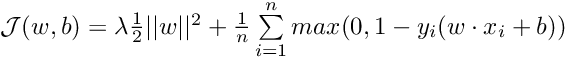

here we can see we have two terms , term1 is to increase the marginal distance and the term two is to cover all the points or classify the points correctly.

Let's have a look at the term two , **max(0,1-Yi(W.Xi + B))** helps us to classify points correctly by increasing the loss if our model classifies the points incorrectly.
Earlier we have seen that **Yi(W.Xi + B) >= 1** only if the points **Xi** lies in correct side of the plane , so it will become **Yi(W.Xi + B) <= -1** if it lies in the wrong side and so the second term helps us to increase the loss , if our model predicts the incorrectly.

The first term is to increase the marginal distance.We know that distance between points and plane is **inversely** proportional to the **||W||** , therefore we need to decrease it in order to increase our marginal distance.The **Lambda** paramter is a regularization parameter , which is kind of like **learning rate**. 

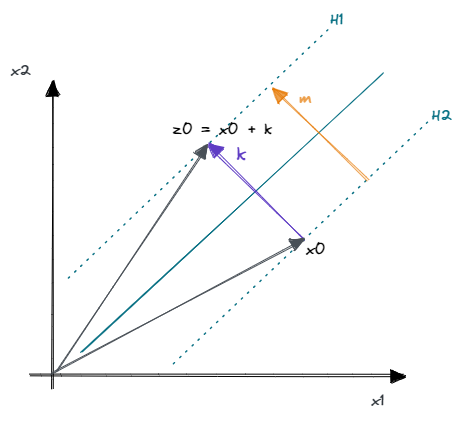

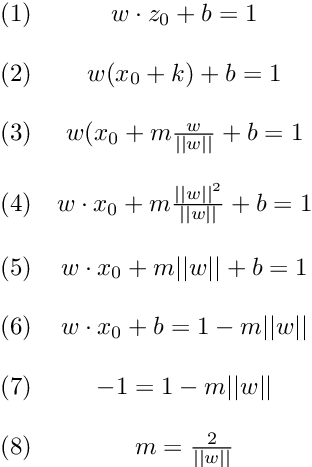

**Here we can see the derivation of the inverse dependence of the " ||W|| " term**. 

Then we need to differentiate the loss Function to update our weight.To obtain the (sub-) gradients, we have to distinguish the objective function between two cases:

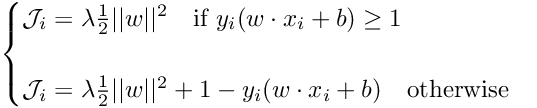


Taking the partial derivatives for the first case gives us the following gradients:

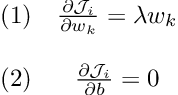

Repeating the same steps for the second case yields:


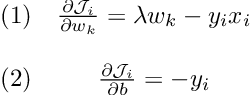

Here we can see the **gradients** which we are going to use to update the weights only depends on **' Xi and Yi '**

We update weight and the bias for the case 2 like this :

**" W = W - lr( lambda.W - Yi.Xi)  "**

**" B = B + Yi (as grad(Lw) = -Yi) "**  

for case 1 only the **lambda.W** term exists in the above equation and all other wil go to zero.

Another important feature of SVM is the **" Kernel Method"**. In the all above exapmles data is linearly seperable what if the data is not linearly seperable? Then we will use kernel method to classify the points.


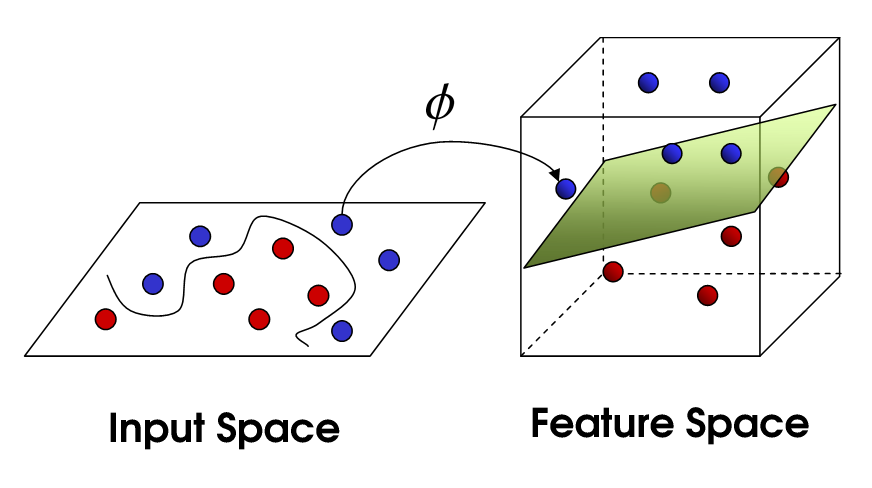


As you can see in the above picture, if we find a way to map the data from 2-dimensional space to 3-dimensional space, we will be able to find a decision surface that clearly divides between different classes. My first thought of this data transformation process is to map all the data point to a higher dimension (in this case, 3 dimension), find the boundary, and make the classification.

That sounds alright. However, when there are more and more dimensions, computations within that space become more and more expensive. This is when the kernel trick comes in. It allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.

Generally the kernel trick will help us to convert the datapoints in inputspace of lower dimension to a higher dimension , so that the datapoints become **"linearly seperable"** in the higher dimension space.
There are different types of kernels available in SVM like "linear kernel","RBF",etc..Each kernel has it's own features and can be used in different situations.

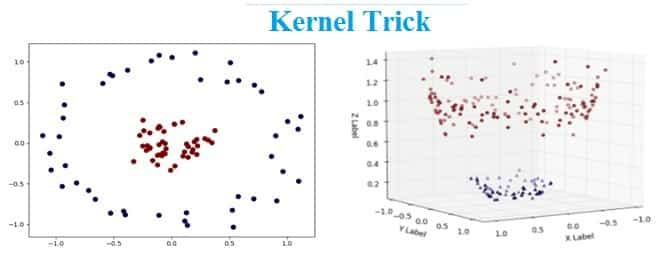

Here in the above image , we are seeing the **"RBF"** kernel , which seperates the datapoints based on the distance between the point and origin. Another example , Here we apply the transformation ϕ(x) = x mod 2

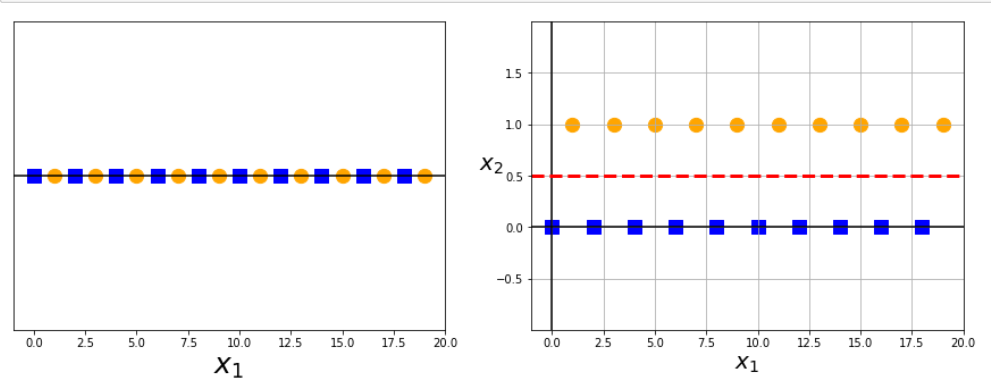

this is the **RBF** Kernel , which is inversely proportional to distance between points.

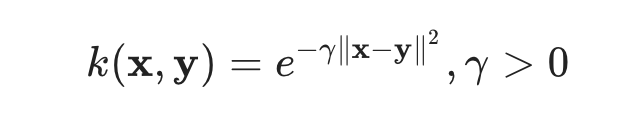

Here it is the **Polynomial kernel** , which is used to seperate data which are seperated by polynomial boundary conditions,As in the topmost image.

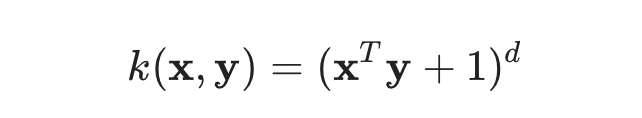


The kernel trick sounds like a “perfect” plan. However, one critical thing to keep in mind is that when we map data to a higher dimension, there are chances that we may overfit the model. Thus choosing the right kernel function (including the right parameters) and regularization are of great importance

In [ ]:
# Implementation of SVM using SKlearn

X,Y = shuffle(X,target,random_state=42) # shuffling the dataset , so it can learn better
x_train , x_test , y_train ,y_test = train_test_split(X, Y, train_size=0.9)
print("Train Shape",x_train.shape)

Train Shape (90, 2)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f' accuracy = {accuracy_score(y_test,y_test)} ')
print(f' coefficients of the class variables = {clf.coef_} ')
print(' intercept  = ',clf.intercept_)
w1,w2 = clf.coef_[0][0] , clf.coef_[0][1]
c = clf.intercept_

 accuracy = 1.0 
 coefficients of the class variables = [[-0.02335033 -1.42690456]] 
 intercept  =  [3.82320082]


 y = mx + c format ; m = -0.016364322098832398 , c = [2.67936688]


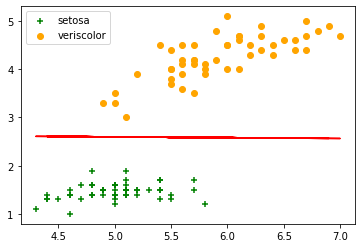

In [ ]:
print(f' y = mx + c format ; m = {-w1/w2} , c = {- c/w2}')

# plotting the data to visualize the results :

plt.scatter(sepal[:50],petal[:50],marker='+',color='green',label="setosa")
plt.scatter(sepal[50:],petal[50:],marker='o',color='orange',label="veriscolor")
x = x_train[:,0]
y = -w1*x_train[:,0]/w2 - c/w2
plt.plot(x,y,color='red')
plt.legend(loc='best')

In [ ]:
# Implementation of SVM from Scratch 

class SVM_model():

  # intializing the data
  def __init__(self,xdata=x_train,ydata=y_train,lr=1e-2,lamb=1e-2,epochs=10000):
    self.x = xdata
    self.y = ydata
    self.lr = lr
    self.lambda_parameter = lamb
    self.epochs = epochs

    self.weights = np.zeros(xdata.shape[1])
    self.bias = 0

  def constraint(self,x,y,w,b): # for getting the constraint 
    constraint = (np.dot(x,w) + b)*y >= 1
    return constraint

  def weight_update(self,dw,db): # for updaring thhe weights
    self.weights -= self.lr*dw
    self.bias -= self.lr*db

  def get_dw_db(self,constraint,x,y,w): # for getting the gradients
    if constraint:
      db = 0
      dw = self.lambda_parameter * w
      return dw,db
    else :
      db = -y
      dw = (self.lambda_parameter*w - np.dot(y,x))
      return dw,db

  def plot_graph(self,w,b,vals): # plottig the data to visualize the results
      y1 = vals[:,0]*(-w[0]/w[1])-(b/w[1])
      plt.scatter(sepal[:50],petal[:50],marker='+',color='green',label="setosa")
      plt.scatter(sepal[50:],petal[50:],marker='o',color='orange',label="veriscolor")
      plt.plot(vals[:,0],y1,color='red')
      plt.show()
  
  def find_hyperplane(self): # impleemnting all the above functions together to train SVM
      e = 1
      epochs = self.epochs

      while e <= epochs:
        for index,vector in enumerate(self.x):
          constraint = self.constraint(vector,self.y[index],self.weights,self.bias)
          dw,db = self.get_dw_db(constraint,vector,self.y[index],self.weights)
          self.weight_update(dw,db)

        if e<=10:
              print(-self.weights[0]/self.weights[1],-self.bias/self.weights[1])
              self.plot_graph(self.weights,self.bias,self.x)
        e += 1
        
Train_SVM = SVM_model()


0.562515237861139 0.2016458178425167


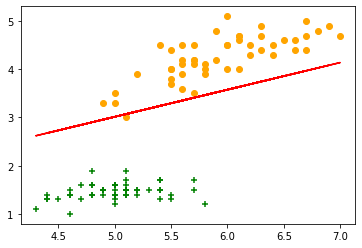

0.4694662276949315 0.18782780073557365


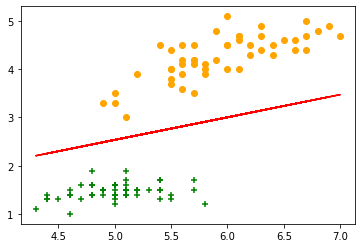

0.5077378306030841 0.19955029540657954


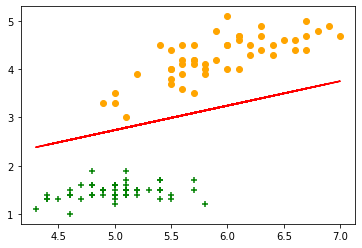

0.4737154148485386 0.19297768602564183


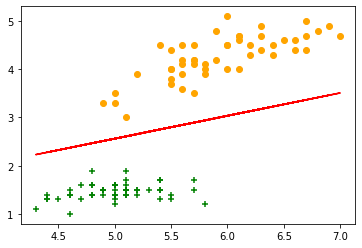

0.48103771522065236 0.19497566040255992


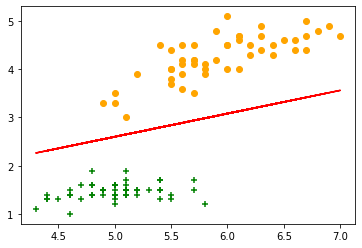

0.48056296124980447 0.19661817919164018


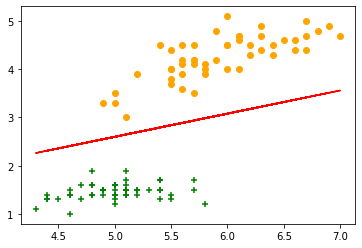

0.4432660191425317 0.18893325175490777


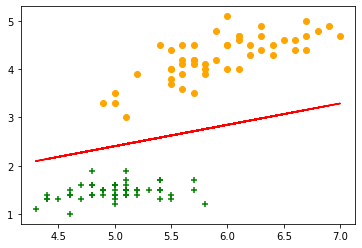

0.4612269671779406 0.19386638437093465


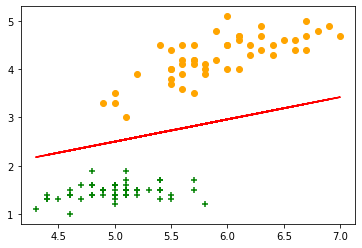

0.44684357693075333 0.1916087113791038


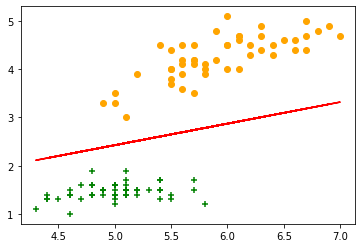

0.4643202249121352 0.19643737053013788


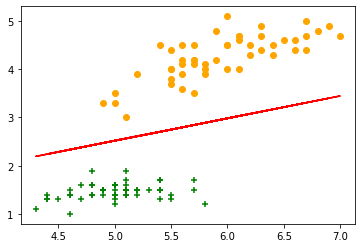

In [ ]:
Train_SVM.find_hyperplane()

**Multiclass Classification**: In this type 
of classification, the machine learning model should classify an instance as only one of three classes or more. For Example, Classifying a text as positive, negative, or neutral.


---


Next question can do multiclass sepeartion with SVM ? The answer is yes , there are certain methods to do that.Those methods are : 



*   One vs One (OVO) approach
*   One vs All (OVA) approach
*   Directed Acyclic Graph (DAG) approach


## One vs One (OVO) approach : 

  This technique breaks down our multiclass classification problem into subproblems which are binary classification problems. So, after this strategy, we get binary classifiers per each pair of classes. For final prediction for any input use the concept of majority voting along with the distance from the margin as its confidence criterion.

The major problem with this approach is that we have to train too many SVMs.

* In the One vs One approach, the classifier can use L(L-1)/2 SVMs or LC2 SVMs.

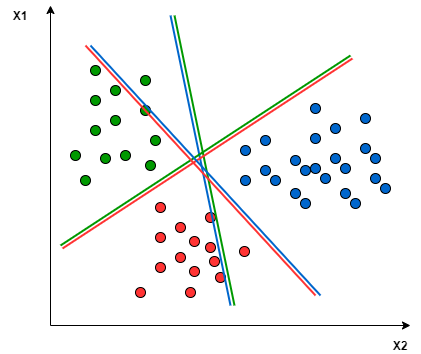

If Our SVM seperates data like this and in this dataset it has created 3 hyperplanes , If we give a green point to it , then two hyperplanes will it as green and one will tell it as blue , so as 2 hyperplanes gives result as green , it will classify it as green.If two classes have same no of votes then margin distance will be considered into account.

# **One vs All (OVA)**

 In this technique, if we have N class problem, then we learn N SVMs:

SVM number -1 learns “class_output = 1” vs “class_output  ≠ 1″

SVM number -2 learns “class_output = 2” vs “class_output ≠ 2″

:

SVM number -N learns “class_output = N” vs “class_output ≠ N”

Then to predict the output for new input, just predict with each of the build SVMs and then find which one puts the prediction the farthest into the positive region (behaves as a confidence criterion for a particular SVM).

Yes, there are some challenges to train these N SVMs, which are:

1. Too much Computation: To implement the OVA strategy, we require more training points which increases our computation.

2. Problems becomes Unbalanced: Let’s you are working on an MNIST dataset, in which there are 10 classes from 0 to 9 and if we have 1000 points per class, then for any one of the SVM having two classes, one class will have 9000 points and other will have only 1000 data points, so our problem becomes unbalanced.
There are some statictical techniques like **"SMOTE"** can be used to get a Balanced from an unbalanced dataset.

In the One vs All approach, the classifier can use **"L"** SVMs.

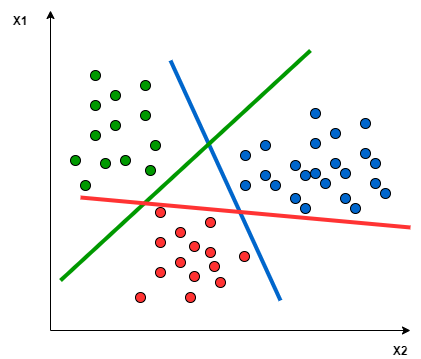


# **Directed Acyclic Graph (DAG)**

This approach is more hierarchical in nature and it tries to addresses the problems of the One vs One and One vs All approach.

* This is a graphical approach in which we group the classes based on some logical grouping.

* Benefits: Benefits of this approach includes a fewer number of SVM trains with respect to the OVA approach and it reduces the diversity from the majority class which is a problem of the OVA approach.



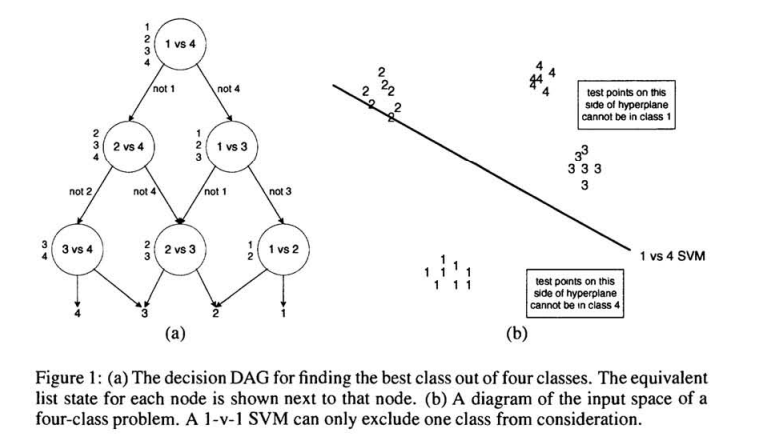